# site vs pheno phipq

In [1]:
import pickle 
with open("../data/hammingglobalDPD_nodel.pkl","rb") as f:
    hammingglobalDPD = pickle.load(f)
with open("../data/hamminglocalDPD_nodel.pkl","rb") as f:
    hamminglocalDPD = pickle.load(f)
with open("../data/edgeD.pkl","rb") as f:
    edgeD = pickle.load(f)
with open("../data/DGPmap.pkl","rb") as f:
    DGPmap = pickle.load(f)
L=12
K=4

In [2]:
from collections import Counter
neutralsets = Counter(DGPmap.values())

In [68]:
from collections import defaultdict
sort_neutralsets = defaultdict(float)
sorted_neutralsets = dict(sorted(neutralsets.items(), key=lambda item: item[1], reverse=True))
for k, v in sorted_neutralsets.items():
    k = k.replace('\n', '')
    sort_neutralsets[k] = v

In [5]:
import pickle
with open("../data/phipq.pkl","rb") as f:
    phipq = pickle.load(f)

L=12
K=4

In [6]:
import pickle
with open("../data/sitesevolvability.pkl","rb") as f:
    sitesevolvability = pickle.load(f)
with open("../data/sitesrobustness.pkl","rb") as f:
    sitesrobustness = pickle.load(f)
with open("../data/siteshammingmean.pkl","rb") as f:
    siteshammingmean = pickle.load(f)
with open("../data/siteshammingstd.pkl","rb") as f:
    siteshammingstd = pickle.load(f)
with open("../data/phi_pq_site.pkl","rb") as f:
    phipq_site = pickle.load(f)


In [7]:
def find_global_maximum(lst):
    max_value = max(lst)  # Find the max value
    max_index = lst.index(max_value)  # Find its index (first occurrence)
    return max_index, max_value
def mutationalneighbours_site(seq,site):
    mutations = {'A': ['C','U','G'],'C': ['A','U','G'],'G': ['A','U','C'], 'U':['A','G','C']}
    return [seq[:site] + m + seq[site+1:] for m in mutations[str(seq[site])]]

# mutational probability
for site-scanning

In [8]:
def hamming(seq1,seq2):
    d = 0
    for i,j in zip(seq1,seq2):
        if i!=j: 
            d+=1
    return d/len(seq1)

In [9]:
phi_global = defaultdict(float)
for key1,set1 in neutralsets.items():
    for key2,set2 in neutralsets.items():
        phi_global[hamming(key1,key2)] += neutralsets[key2]

phi_global_nodel = defaultdict(float)
for key1,set1 in neutralsets.items():
    if key1 == '.'*L:
        continue
    for key2,set2 in neutralsets.items():
        if key2 == '.'*L:
            continue
        phi_global_nodel[hamming(key1,key2)] += neutralsets[key2]

phi_global_nodel_norobust = defaultdict(float)
for key1,set1 in neutralsets.items():
    if key1 == '.'*L:
        continue
    for key2,set2 in neutralsets.items():
        if key2 == '.'*L:
            continue
        if key1 == key2:
            continue
        phi_global_nodel_norobust[hamming(key1,key2)] += neutralsets[key2]

In [10]:
phi_global_nodel_norobust

defaultdict(float,
            {0.3333333333333333: 39399211.0,
             0.16666666666666666: 19324682.0,
             0.6666666666666666: 9725349.0,
             0.5: 27769828.0,
             0.8333333333333334: 2763432.0,
             1.0: 131950.0})

In [11]:
normalisation = sum(list(phi_global.values()))
sorted_keys = sorted(phi_global.keys())
global_phi = defaultdict(float)
for H in sorted_keys:
    global_phi[H] = phi_global[H]/normalisation

global_phi_nodel = defaultdict(float)
normalisation = sum(list(phi_global_nodel.values()))
sorted_keys = sorted(phi_global_nodel.keys())
for H in sorted_keys:
    global_phi_nodel[H] = phi_global_nodel[H]/normalisation

global_phi_nodel_norobust = defaultdict(float)
normalisation = sum(list(phi_global_nodel_norobust.values()))
sorted_keys = sorted(phi_global_nodel_norobust.keys())
for H in sorted_keys:
    global_phi_nodel_norobust[H] = phi_global_nodel_norobust[H]/normalisation

In [12]:
phi_hammingq_norob = defaultdict(lambda: defaultdict(float))
phi_hammingq = defaultdict(lambda: defaultdict(float))
phi_hammingq_del = defaultdict(lambda: defaultdict(float))

for q,pdict in phipq.items():
    robustnessterm = pdict[q]*neutralsets[q]*L*(K-1)
    if q == '.'*L: continue
    for p,value in pdict.items():
        if p == '.'*L: continue
        if p == q: continue
        phi_hammingq_norob[q][hamming(p,q)]+=value*(neutralsets[q]*L*(K-1) - robustnessterm)

for q,pdict in phipq.items():
    if q == '.'*L: continue
    for p,value in pdict.items():
        if p == '.'*L: continue
        phi_hammingq[q][hamming(p,q)]+=value*neutralsets[q]*L*(K-1)

for q,pdict in phipq.items():
    for p,value in pdict.items():
        phi_hammingq_del[q][hamming(p,q)]+=value*neutralsets[q]*L*(K-1)

In [13]:
import numpy as np

hamming_local_norob = defaultdict(list)
hamming_local_mean_norob = defaultdict(list)
hamming_local_err_norob = defaultdict(list)


for q,Hdict in phi_hammingq_norob.items():
    for H,value in Hdict.items():
        hamming_local_norob[H].append(value/sum(Hdict.values()))
sorted_keys = sorted(hamming_local_norob.keys())

for H in sorted_keys:
    hamming_local_mean_norob[H] = np.mean(hamming_local_norob[H])
    hamming_local_err_norob[H] = np.std(hamming_local_norob[H])

hamming_local = defaultdict(list)
hamming_local_mean = defaultdict(float)
hamming_local_err = defaultdict(float)

for q,Hdict in phi_hammingq.items():
    for H,value in Hdict.items():
        hamming_local[H].append(value/sum(Hdict.values()))
sorted_keys = sorted(hamming_local.keys())

for H in sorted_keys:
    hamming_local_mean[H] = np.mean(hamming_local[H])
    hamming_local_err[H] = np.std(hamming_local[H])

    
hamming_local_del = defaultdict(list)
hamming_local_mean_del = defaultdict(float)
hamming_local_err_del = defaultdict(float)
for q,Hdict in phi_hammingq_del.items():
    for H,value in Hdict.items():
        hamming_local_del[H].append(value/sum(Hdict.values()))

sorted_keys = sorted(hamming_local_del.keys())

for H in sorted_keys:
    hamming_local_mean_del[H] = np.mean(hamming_local_del[H])
    hamming_local_err_del[H] = np.std(hamming_local_del[H])



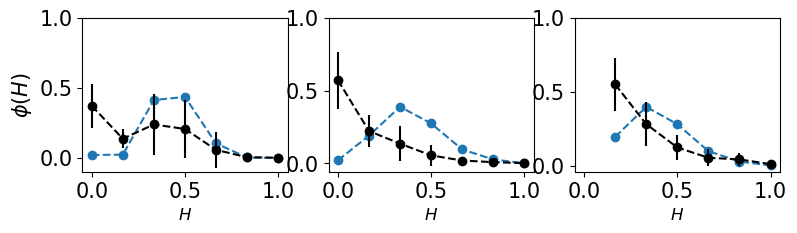

In [116]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9, 2))

gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1],sharex=ax1)
ax3 = fig.add_subplot(gs[2],sharex=ax1)
ax1.plot(list(global_phi.keys()),list(global_phi.values()),'o--')
ax1.errorbar(list(hamming_local_mean_del.keys()),list(hamming_local_mean_del.values()),yerr=list(hamming_local_err_del.values()),fmt='o--', color='black')
ax2.plot(list(global_phi_nodel.keys()),list(global_phi_nodel.values()),'o--')
ax2.errorbar(list(hamming_local_mean.keys()),list(hamming_local_mean.values()),yerr=list(hamming_local_err.values()),fmt='o--', color='black')
ax3.plot(list(global_phi_nodel_norobust.keys()),list(global_phi_nodel_norobust.values()),'o--')
ax3.errorbar(list(hamming_local_mean_norob.keys()),list(hamming_local_mean_norob.values()),yerr=list(hamming_local_err_norob.values()),fmt='o--', color='black')
ax1.set_yticks([0.0,0.5,1.0])
ax2.set_yticks([0.0,0.5,1.0])
ax3.set_yticks([0.0,0.5,1.0])
ax1.set_xlabel(r'$H$',size=12)
ax2.set_xlabel(r'$H$',size=12)
ax3.set_xlabel(r'$H$',size=12)
ax1.set_ylabel(r'$\phi(H)$', size=15)
for ax in [ax1, ax2, ax3]:
    ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust the label size as needed
plt.savefig("phi_hamming.eps",bbox_inches='tight')

In [15]:
hamminglocalDPD

defaultdict(functools.partial(<class 'collections.defaultdict'>, <class 'float'>),
            {'....((....))': defaultdict(float,
                         {0.16666666666666666: 12980.0,
                          0.5: 19266.0,
                          0.3333333333333333: 12953.0,
                          0.6666666666666666: 20429.0,
                          0.8333333333333334: 13146.0}),
             '..(((....)))': defaultdict(float,
                         {0.16666666666666666: 386673.0,
                          0.3333333333333333: 111802.0,
                          0.5: 94258.0,
                          0.6666666666666666: 55023.0,
                          0.8333333333333334: 33786.0}),
             '...((....)).': defaultdict(float,
                         {0.16666666666666666: 262021.0,
                          0.3333333333333333: 81936.0,
                          0.5: 72013.0,
                          0.6666666666666666: 30247.0,
                          0.8333333333

# site-quantities 

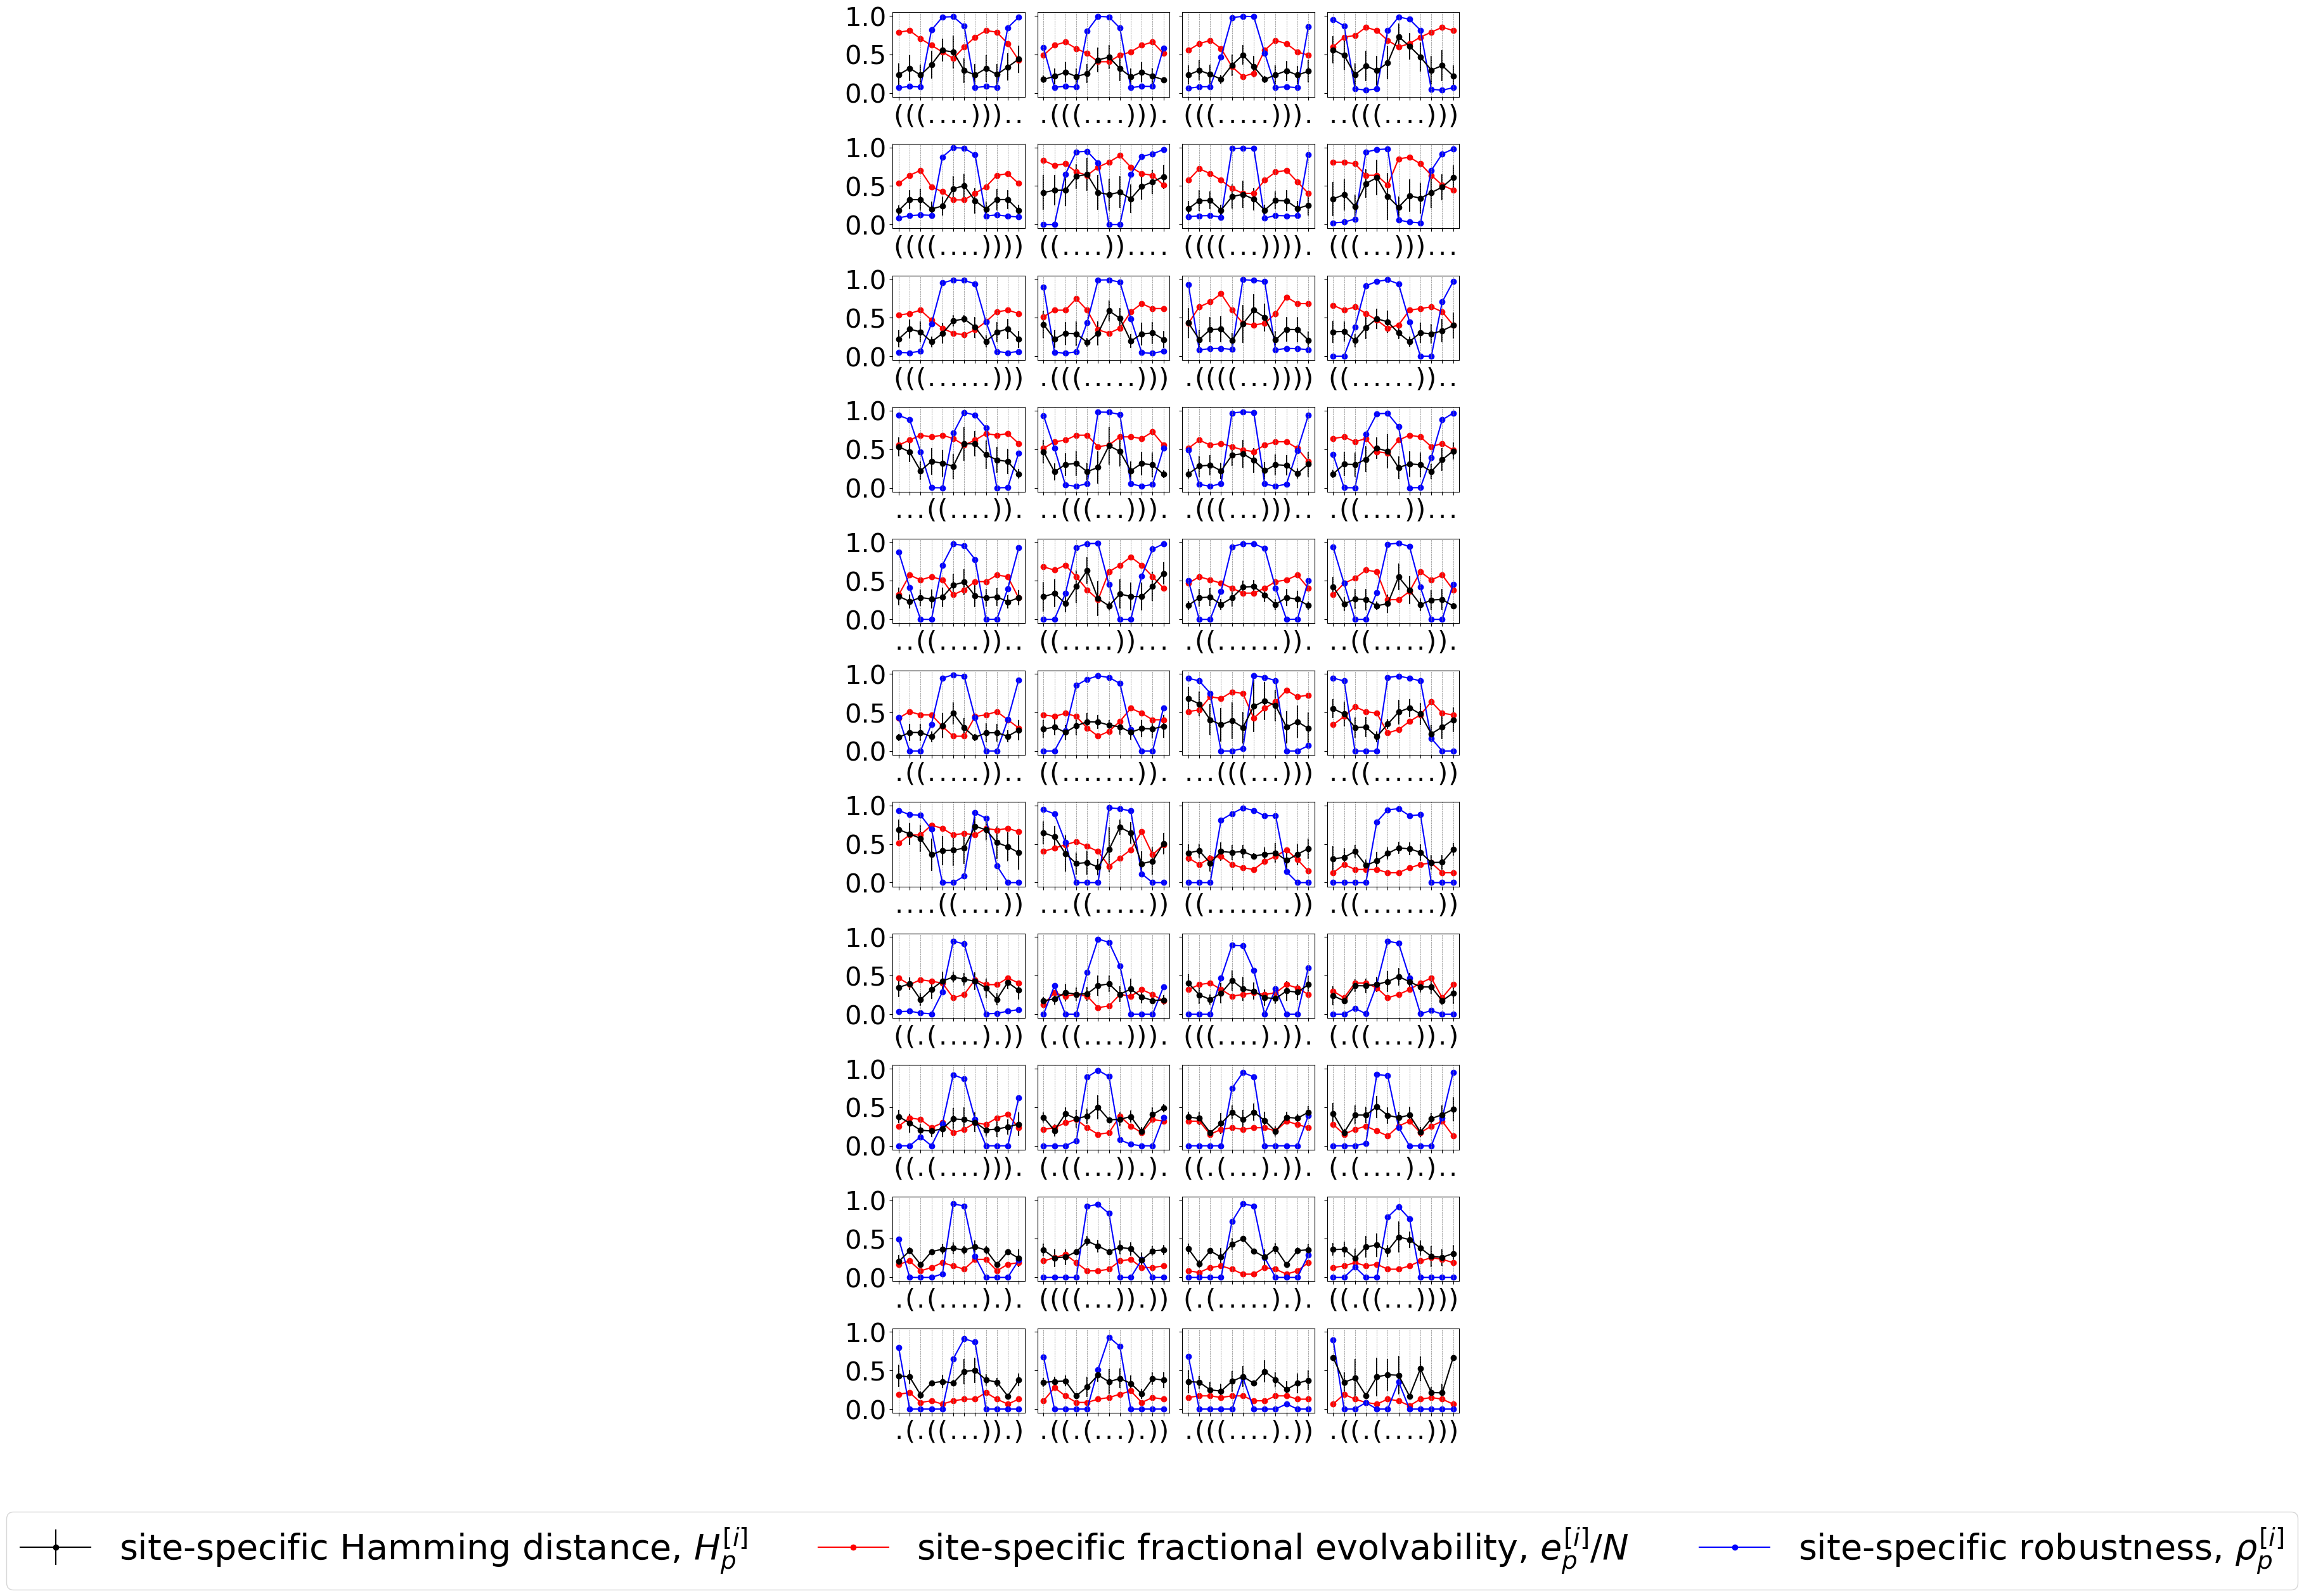

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict, Counter
import functools
import matplotlib.cm as cm
# Define the number of rows
num_rows = 11

# Calculate the number of columns needed
num_cols = 4
L = 12
# Create a figure with the appropriate number of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2.5, num_rows * 2.2), sharey=True)

# Flatten the axs array for easy iteration
axs = axs.flatten()
sites_pos = np.arange(1, L + 1, 1)
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10

# Collect handles and labels for the legend
handles, labels = [], []
listneutralsets = list(sort_neutralsets.keys())
largerobustsite = defaultdict(list)
largerobustsite_filtered= defaultdict(dict)
for i, ax in enumerate(axs):
    if i < len(listneutralsets):
        
        key = listneutralsets[i + 1]
        
        # Fill the data dictionary with relative areas
       

        # Plot the line plot on top of the bar plot
        siteshamming = [0] * L
        siteshammingerr = [0] * L
        dataevolvability = [0] * L
        dataevolvweight = [0] * L
        datarobust = [0] * L

        for site, avgs in siteshammingmean[key].items():
            siteshamming[site] = avgs
            siteshammingerr[site] = siteshammingstd[key][site]
            dataevolvability[site] = sitesevolvability[key][site]  # Fractional evolvability
            datarobust[site] = sitesrobustness[key][site]
        

        line1 = ax.errorbar(sites_pos, np.array(siteshamming), yerr=np.array(siteshammingerr), fmt = '-o', color='black', label=r'site-specific Hamming distance, $H_p^{[i]}$')
        line2, = ax.plot(sites_pos, np.array(dataevolvability), '-o', color='red', label=r'site-specific fractional evolvability, $e_p^{[i]}/N$')
        line3, = ax.plot(sites_pos, np.array(datarobust), '-o', color='blue', label=r'site-specific robustness, $\rho_p^{[i]}$')

        # Collect handles and labels from the plots
        if i == 0:
            handles.extend([line1, line2, line3])
            labels.extend([line1.get_label(), line2.get_label(), line3.get_label()])

        # Custom x-tick labels with larger or bold characters
        new_labels = []
        sumchar = 0
        labeldict = Counter(key)
        for char in key:
            if char == '.' and sumchar == labeldict['(']:
                new_labels.append('.')
            else:
                if char == '(':
                    sumchar += 1
                elif char == ')':
                    sumchar -= 1
                new_labels.append(char)
        ax.set_xticks(sites_pos)
        ax.set_xticklabels(new_labels, size=20)
        #ax.set_title(f'$f_p$: {sort_neutralsets[key]/K**L}', fontsize=30)
        ax.set_yticks([1.0, 0.5, 0.0])
        ax.tick_params(axis='both', which='major', labelsize=30)  # Set tick label size
        for pos in sites_pos:
            ax.axvline(x=pos, color='gray', linestyle='--', linewidth=0.5)

# Add a legend for the entire figure at the bottom with two rows
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=(len(listneutralsets) + 1) // 4, fontsize=40)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("sitequantities.png", bbox_inches='tight')
plt.show()

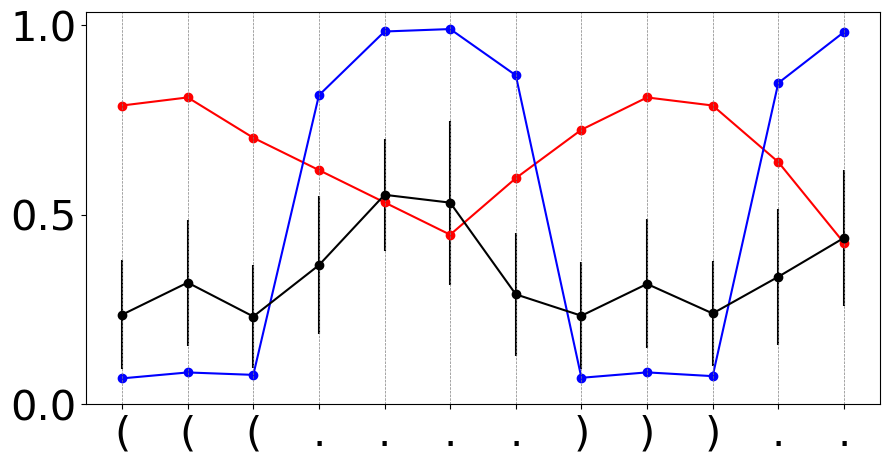

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict, Counter
import functools
import matplotlib.cm as cm
import numpy as np
L = 12
# Create a figure with the appropriate number of subplots
fig, ax= plt.subplots(figsize=(9,5), sharey=True)

# Flatten the axs array for easy iteration
sites_pos = np.arange(1, L + 1, 1)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12

# Collect handles and labels for the legend
handles, labels = [], []
listneutralsets = list(sort_neutralsets.keys())
largerobustsite = defaultdict(list)
largerobustsite_filtered= defaultdict(dict)
i = 0

key = listneutralsets[i + 1]

# Fill the data dictionary with relative areas


# Plot the line plot on top of the bar plot
siteshamming = [0] * L
siteshammingerr = [0] * L
dataevolvability = [0] * L
dataevolvweight = [0] * L
datarobust = [0] * L

for site, avgs in siteshammingmean[key].items():
    siteshamming[site] = avgs
    siteshammingerr[site] = siteshammingstd[key][site]
    dataevolvability[site] = sitesevolvability[key][site]  # Fractional evolvability
    datarobust[site] = sitesrobustness[key][site]


ax.errorbar(sites_pos,siteshamming, yerr=siteshammingerr, fmt = '-o', color='black', label=r'site-specific Hamming distance, $H_p^{[i]}$')
ax.plot(sites_pos, np.array(dataevolvability), '-o', color='red', label=r'site-specific fractional evolvability, $e_p^{[i]}/N$')
ax.plot(sites_pos, np.array(datarobust), '-o', color='blue', label=r'site-specific robustness, $\rho_p^{[i]}$')

# Collect handles and labels from the plots
if i == 0:
    handles.extend([line1, line2, line3])
    labels.extend([line1.get_label(), line2.get_label(), line3.get_label()])

# Custom x-tick labels with larger or bold characters
new_labels = []
sumchar = 0
labeldict = Counter(key)
for char in key:
    if char == '.' and sumchar == labeldict['(']:
        new_labels.append('.')
    else:
        if char == '(':
            sumchar += 1
        elif char == ')':
            sumchar -= 1
        new_labels.append(char)
ax.set_xticks(sites_pos)
ax.set_xticklabels(new_labels, size=20)
#ax.set_title(f'$f_p$: {sort_neutralsets[key]/K**L}', fontsize=30)
ax.set_yticks([1.0, 0.5, 0.0])
ax.tick_params(axis='both', which='major', labelsize=30)  # Set tick label size
for pos in sites_pos:
    ax.axvline(x=pos, color='gray', linestyle='--', linewidth=0.5)

# Add a legend for the entire figure at the bottom with two rows
#fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=(len(listneutralsets) + 1) // 4, fontsize=40)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("sitequantities.eps", bbox_inches='tight')
plt.show()

# correlations

/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value e

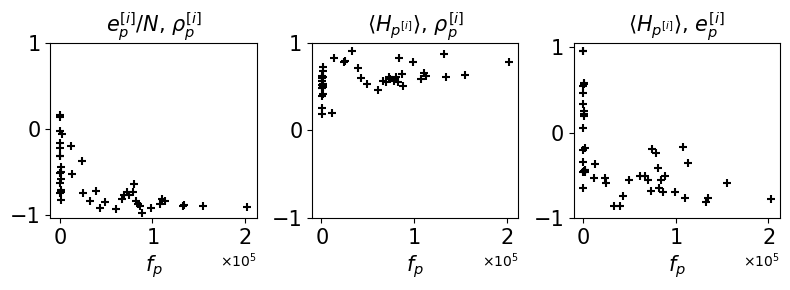

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, defaultdict, OrderedDict
import functools
from matplotlib.ticker import ScalarFormatter

# Initialize variables
freq = []
corr_er_uc = []
corr_er_c = []
corr_er_in = []
corr_er = []
corr_hr_uc = []
corr_hr_c = []
corr_hr_in = []
corr_hr = []
corr_he_uc = []
corr_he_c = []
corr_he_in = []
corr_he = []
dataevolvabilitytott = []
datarobustnesstott = []
siteshamming = []
sitesminev = defaultdict(int)
datarobustpheno = defaultdict(float)


listneutralsets = list(sort_neutralsets.keys())

for key in listneutralsets:
    sitesum = 0
    dataevolvability_uc = []
    datarobustness_uc = []
    siteshamming_uc = []
    dataevolvability_c = []
    datarobustness_c = []
    siteshamming_c = []
    dataevolvability_in = []
    datarobustness_in = []
    siteshamming_in = []
    dataevolvability = []
    datarobustness = []
    siteshamming = []
    datarobustnesstot = []
    for site in range(12):
            dictsymbols = Counter(key)  # Count the number of symbols at each site
            #if sitesum >= dictsymbols['(']:
            #    siteshamming_in.append(avgs / edgeD_nodel[key][site])
            #    dataevolvability_in.append(phenos_site_evol[key][site] / (len(sort_neutralsets) - 1))  # Fractional evolvability
            #    datarobustness_in.append(phenos_site_robust[key][site] / edge_site_robust[key])  # Fractional robustness
            # if key[site] == '.':
            #     siteshamming_uc.append(siteshammingmean[key][site])
            #     dataevolvability_uc.append(sitesevolvability[key][site])  # Fractional evolvability
            #     datarobustness_uc.append(sitesrobustness[key][site])
            #     sitesum += 0
            # elif key[site] == '(':
            #     siteshamming_c.append(siteshammingmean[key][site])
            #     dataevolvability_c.append(sitesevolvability[key][site])
            #     datarobustness_c.append(sitesrobustness[key][site])
            #     sitesum += 1
            # elif key[site] == ')':
            #     siteshamming_c.append(siteshammingmean[key][site])
            #     dataevolvability_c.append(sitesevolvability[key][site])
            #     datarobustness_c.append(sitesrobustness[key][site])
            #     sitesum -= 1
        
            siteshamming.append(siteshammingmean[key][site])
            dataevolvability.append(sitesevolvability[key][site])  # Fractional evolvability
            datarobustness.append(sitesrobustness[key][site])  # Fractional robustness
    
    corr_er_uc.append(np.corrcoef(datarobustness_uc, dataevolvability_uc)[0, 1])
    corr_er_c.append(np.corrcoef(datarobustness_c, dataevolvability_c)[0, 1])
    corr_er_in.append(np.corrcoef(datarobustness_in, dataevolvability_in)[0, 1])
    corr_er.append(np.corrcoef(datarobustness, dataevolvability)[0, 1])
    corr_hr_uc.append(np.corrcoef(siteshamming_uc, datarobustness_uc)[0, 1])
    corr_hr_c.append(np.corrcoef(siteshamming_c, datarobustness_c)[0, 1])
    corr_hr_in.append(np.corrcoef(siteshamming_in, datarobustness_in)[0, 1])
    corr_hr.append(np.corrcoef(siteshamming, datarobustness)[0, 1])
    corr_he_uc.append(np.corrcoef(siteshamming_uc, dataevolvability_uc)[0, 1])
    corr_he_c.append(np.corrcoef(siteshamming_c, dataevolvability_c)[0, 1])
    corr_he_in.append(np.corrcoef(siteshamming_in, dataevolvability_in)[0, 1])
    corr_he.append(np.corrcoef(siteshamming, dataevolvability)[0, 1])
    freq.append(sort_neutralsets[key])

#phenotype evolvability and robustness
#dataevolvabilitytott = []
#datarobustnesstott = []
#for pheno in evolvtot.keys():
#    dataevolvabilitytott.append(evolvtot[pheno])
#    datarobustnesstott.append(datarobustpheno[pheno])

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(8, 3))

# Collect handles and labels for the legend
handles, labels = [], []

# Plot the first subplot
#scatter1 = axs[0].scatter(freq, corr_er_uc, color='black', label=r'unconstrained')
#scatter2 = axs[0].scatter(freq, corr_er_c, color='blue', label=r'constrained')
#scatter3 = axs[0].scatter(freq, corr_er_in, color='green', label=r'(x) unconstrained only')
scatter4 = axs[0].scatter(freq, corr_er, color='black', marker='+')
#axs[0].set_xscale('log')
axs[0].set_xlabel('$f_p$', fontsize=15)
#axs[0].set_ylabel(r'Pearson $r$', fontsize=15)
axs[0].set_title(r'$e_p^{[i]}/N$, $\rho_p^{[i]}$', fontsize=15)
axs[0].tick_params(axis='both', which='major', labelsize=15)

# Plot the second subplot
#axs[1].scatter(freq, corr_hr_uc, color='black', label=r'hr_uc')
#axs[1].scatter(freq, corr_hr_c, color='blue', label=r'hr_c')
#axs[1].scatter(freq, corr_hr_in, color='green', label=r'hr_in')
axs[1].scatter(freq, corr_hr, color='black', marker='+')
#axs[1].set_xscale('log')
#axs[1].set_ylabel(r'Pearson $r$', fontsize=15)
axs[1].set_xlabel('$f_p$', fontsize=15)
axs[1].set_title(r'$\langle H_{p^{[i]}}\rangle$, $\rho_p^{[i]}$', fontsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=15)

# Plot the third subplot
#axs[2].scatter(freq, corr_he_uc, color='black', label=r'he_uc', marker='o')
#axs[2].scatter(freq, corr_he_c, color='blue', label=r'he_c')
#axs[2].scatter(freq, corr_he_in, color='green', label=r'he_in', marker='o')
axs[2].scatter(freq, corr_he, color='black', marker='+')
#axs[2].set_xscale('log')
axs[2].set_xlabel('$f_p$', fontsize=15)
axs[2].set_title(r'$\langle H_{p^{[i]}}\rangle$, $e_p^{[i]}$', fontsize=15)
axs[2].tick_params(axis='both', which='major', labelsize=15)

# Collect handles and labels from the plots
#handles.extend([scatter1, scatter2, scatter3, scatter4])
#handles.extend([scatter1, scatter2, scatter4])
#handles.extend([scatter1, scatter2])
#labels.extend([scatter1.get_label(), scatter2.get_label(), scatter3.get_label(), scatter4.get_label()])
#labels.extend([scatter1.get_label(), scatter2.get_label()])

# Format x-ticks in scientific notation
for ax in axs:
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.xaxis.get_major_formatter().set_powerlimits((0, 0))
    ax.set_yticks([1.0, 0.0, -1.0])

# Add a legend for the entire figure at the bottom with two rows
#fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=1, fontsize=15)

# Show the plot
plt.tight_layout()
plt.savefig("correlationstot.pdf", bbox_inches='tight')
plt.show()

/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value e

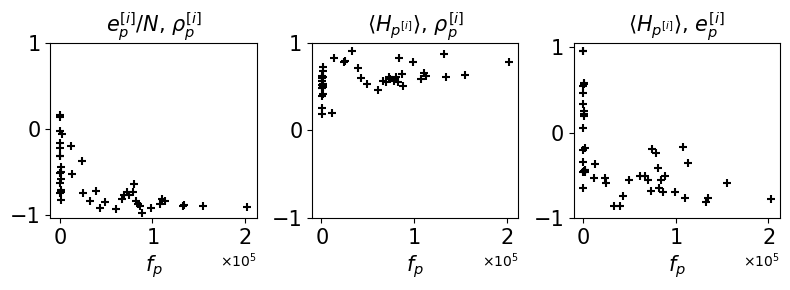

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, defaultdict, OrderedDict
import functools
from matplotlib.ticker import ScalarFormatter

# Initialize variables
freq = []
corr_er_uc = []
corr_er_c = []
corr_er_in = []
corr_er = []
corr_hr_uc = []
corr_hr_c = []
corr_hr_in = []
corr_hr = []
corr_he_uc = []
corr_he_c = []
corr_he_in = []
corr_he = []
dataevolvabilitytott = []
datarobustnesstott = []
siteshamming = []
sitesminev = defaultdict(int)
datarobustpheno = defaultdict(float)


listneutralsets = list(sort_neutralsets.keys())
for key in listneutralsets:
    sitesum = 0
    dataevolvability_uc = []
    datarobustness_uc = []
    siteshamming_uc = []
    dataevolvability_c = []
    datarobustness_c = []
    siteshamming_c = []
    dataevolvability_in = []
    datarobustness_in = []
    siteshamming_in = []
    dataevolvability = []
    datarobustness = []
    siteshamming = []
    datarobustnesstot = []
    for site in range(12):
            dictsymbols = Counter(key)  # Count the number of symbols at each site
            #if sitesum >= dictsymbols['(']:
            #    siteshamming_in.append(avgs / edgeD_nodel[key][site])
            #    dataevolvability_in.append(phenos_site_evol[key][site] / (len(sort_neutralsets) - 1))  # Fractional evolvability
            #    datarobustness_in.append(phenos_site_robust[key][site] / edge_site_robust[key])  # Fractional robustness
            # if key[site] == '.':
            #     siteshamming_uc.append(siteshammingmean[key][site])
            #     dataevolvability_uc.append(sitesevolvability[key][site])  # Fractional evolvability
            #     datarobustness_uc.append(sitesrobustness[key][site])
            #     sitesum += 0
            # elif key[site] == '(':
            #     siteshamming_c.append(siteshammingmean[key][site])
            #     dataevolvability_c.append(sitesevolvability[key][site])
            #     datarobustness_c.append(sitesrobustness[key][site])
            #     sitesum += 1
            # elif key[site] == ')':
            #     siteshamming_c.append(siteshammingmean[key][site])
            #     dataevolvability_c.append(sitesevolvability[key][site])
            #     datarobustness_c.append(sitesrobustness[key][site])
            #     sitesum -= 1
        
            siteshamming.append(siteshammingmean[key][site])
            dataevolvability.append(sitesevolvability[key][site])  # Fractional evolvability
            datarobustness.append(sitesrobustness[key][site])  # Fractional robustness
    
    corr_er_uc.append(np.corrcoef(datarobustness_uc, dataevolvability_uc)[0, 1])
    corr_er_c.append(np.corrcoef(datarobustness_c, dataevolvability_c)[0, 1])
    corr_er_in.append(np.corrcoef(datarobustness_in, dataevolvability_in)[0, 1])
    corr_er.append(np.corrcoef(datarobustness, dataevolvability)[0, 1])
    corr_hr_uc.append(np.corrcoef(siteshamming_uc, datarobustness_uc)[0, 1])
    corr_hr_c.append(np.corrcoef(siteshamming_c, datarobustness_c)[0, 1])
    corr_hr_in.append(np.corrcoef(siteshamming_in, datarobustness_in)[0, 1])
    corr_hr.append(np.corrcoef(siteshamming, datarobustness)[0, 1])
    corr_he_uc.append(np.corrcoef(siteshamming_uc, dataevolvability_uc)[0, 1])
    corr_he_c.append(np.corrcoef(siteshamming_c, dataevolvability_c)[0, 1])
    corr_he_in.append(np.corrcoef(siteshamming_in, dataevolvability_in)[0, 1])
    corr_he.append(np.corrcoef(siteshamming, dataevolvability)[0, 1])
    freq.append(sort_neutralsets[key])

#phenotype evolvability and robustness
#dataevolvabilitytott = []
#datarobustnesstott = []
#for pheno in evolvtot.keys():
#    dataevolvabilitytott.append(evolvtot[pheno])
#    datarobustnesstott.append(datarobustpheno[pheno])

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(8, 3))

# Collect handles and labels for the legend
handles, labels = [], []

# Plot the first subplot
#scatter1 = axs[0].scatter(freq, corr_er_uc, color='black', label=r'unconstrained')
#scatter2 = axs[0].scatter(freq, corr_er_c, color='blue', label=r'constrained')
#scatter3 = axs[0].scatter(freq, corr_er_in, color='green', label=r'(x) unconstrained only')
scatter4 = axs[0].scatter(freq, corr_er, color='black', marker='+')
#axs[0].set_xscale('log')
axs[0].set_xlabel('$f_p$', fontsize=15)
#axs[0].set_ylabel(r'Pearson $r$', fontsize=15)
axs[0].set_title(r'$e_p^{[i]}/N$, $\rho_p^{[i]}$', fontsize=15)
axs[0].tick_params(axis='both', which='major', labelsize=15)

# Plot the second subplot
#axs[1].scatter(freq, corr_hr_uc, color='black', label=r'hr_uc')
#axs[1].scatter(freq, corr_hr_c, color='blue', label=r'hr_c')
#axs[1].scatter(freq, corr_hr_in, color='green', label=r'hr_in')
axs[1].scatter(freq, corr_hr, color='black', marker='+')
#axs[1].set_xscale('log')
#axs[1].set_ylabel(r'Pearson $r$', fontsize=15)
axs[1].set_xlabel('$f_p$', fontsize=15)
axs[1].set_title(r'$\langle H_{p^{[i]}}\rangle$, $\rho_p^{[i]}$', fontsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=15)

# Plot the third subplot
#axs[2].scatter(freq, corr_he_uc, color='black', label=r'he_uc', marker='o')
#axs[2].scatter(freq, corr_he_c, color='blue', label=r'he_c')
#axs[2].scatter(freq, corr_he_in, color='green', label=r'he_in', marker='o')
axs[2].scatter(freq, corr_he, color='black', marker='+')
#axs[2].set_xscale('log')
axs[2].set_xlabel('$f_p$', fontsize=15)
axs[2].set_title(r'$\langle H_{p^{[i]}}\rangle$, $e_p^{[i]}$', fontsize=15)
axs[2].tick_params(axis='both', which='major', labelsize=15)

# Collect handles and labels from the plots
#handles.extend([scatter1, scatter2, scatter3, scatter4])
#handles.extend([scatter1, scatter2, scatter4])
#handles.extend([scatter1, scatter2])
#labels.extend([scatter1.get_label(), scatter2.get_label(), scatter3.get_label(), scatter4.get_label()])
#labels.extend([scatter1.get_label(), scatter2.get_label()])

# Format x-ticks in scientific notation
for ax in axs:
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.xaxis.get_major_formatter().set_powerlimits((0, 0))
    ax.set_yticks([1.0, 0.0, -1.0])

# Add a legend for the entire figure at the bottom with two rows
#fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=1, fontsize=15)

# Show the plot
plt.tight_layout()
plt.savefig("correlationstot.pdf", bbox_inches='tight')
plt.show()

In [ ]:

plt.hist(corr_er, bins=10, alpha=0.8, color='black', label=r'$e_p^{[i]}/N$, $\rho_p^{[i]}$', density=False)
plt.hist(corr_hr, bins=10, alpha=0.8, color='blue', label=r'$\langle H_{p^{[i]}}\rangle$, $\rho_p^{[i]}$', density=False)
plt.hist(corr_he, bins=10, alpha=0.8, color='green', label=r'$\langle H_{p^{[i]}}\rangle$, $e_p^{[i]}$', density=False)
plt.xticks([-1.0, -0.5, 0.0, 0.5, 1.0])
plt.xlabel('Pearson r')
plt.ylabel('Frequency')

ValueError: autodetected range of [nan, nan] is not finite

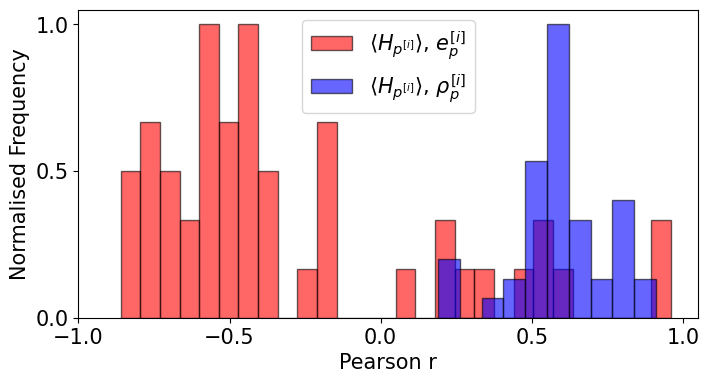

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Clean the data by removing NaN and infinite values
corr_er = np.array(corr_er)
corr_hr = np.array(corr_hr)
corr_he = np.array(corr_he)
corr_er = corr_er[~np.isnan(corr_er) & np.isfinite(corr_er)]
corr_hr = corr_hr[~np.isnan(corr_hr) & np.isfinite(corr_hr)]
corr_he = corr_he[~np.isnan(corr_he) & np.isfinite(corr_he)]


# Normalize histograms manually
counts_er, bins_er = np.histogram(corr_er, bins=10, density=False)
counts_hr, bins_hr = np.histogram(corr_hr, bins=10, density=False)
counts_he, bins_he = np.histogram(corr_he, bins=28, density=False)

# Normalize counts to make the maximum y-axis value 1
counts_er = counts_er / counts_er.max()
counts_hr = counts_hr / counts_hr.max()
counts_he = counts_he / counts_he.max()

fig, ax = plt.subplots(figsize=(8, 4))
# Plot normalized histograms
#plt.hist(bins_er[:-1], bins_er, weights=counts_er, alpha=0.6, color='purple',edgecolor='black', label=r'$e_p^{[i]}/N$, $\rho_p^{[i]}$')
plt.hist(bins_he[:-1], bins_he, weights=counts_he, alpha=0.6, color='red', edgecolor = 'black', label=r'$\langle H_{p^{[i]}}\rangle$, $e_p^{[i]}$')
plt.hist(bins_hr[:-1], bins_hr, weights=counts_hr, alpha=0.6, color='blue',edgecolor = 'black', label=r'$\langle H_{p^{[i]}}\rangle$, $\rho_p^{[i]}$')

# Add labels and ticks
plt.xticks([-1.0, -0.5, 0.0, 0.5, 1.0], fontsize=15)
plt.yticks([0.0,0.5,1.0],fontsize=15)
plt.xlabel('Pearson r')
plt.ylabel('Normalised Frequency')
plt.legend(fontsize = 15)  # Add legend to display labels
plt.savefig("histogram_correlation.pdf", bbox_inches='tight')

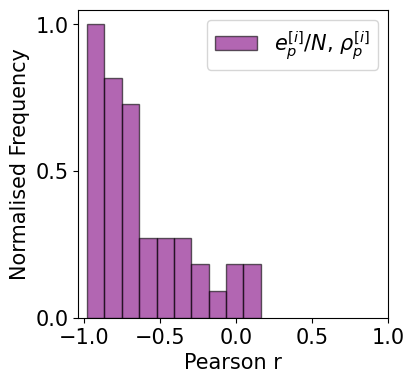

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Clean the data by removing NaN and infinite values
corr_er = np.array(corr_er)
corr_hr = np.array(corr_hr)
corr_he = np.array(corr_he)
corr_er = corr_er[~np.isnan(corr_er) & np.isfinite(corr_er)]
corr_hr = corr_hr[~np.isnan(corr_hr) & np.isfinite(corr_hr)]
corr_he = corr_he[~np.isnan(corr_he) & np.isfinite(corr_he)]


# Normalize histograms manually
counts_er, bins_er = np.histogram(corr_er, bins=10, density=False)
counts_hr, bins_hr = np.histogram(corr_hr, bins=10, density=False)
counts_he, bins_he = np.histogram(corr_he, bins=28, density=False)

# Normalize counts to make the maximum y-axis value 1
counts_er = counts_er / counts_er.max()
counts_hr = counts_hr / counts_hr.max()
counts_he = counts_he / counts_he.max()

fig, ax = plt.subplots(figsize=(4, 4))
# Plot normalized histograms
plt.hist(bins_er[:-1], bins_er, weights=counts_er, alpha=0.6, color='purple',edgecolor='black', label=r'$e_p^{[i]}/N$, $\rho_p^{[i]}$')
#plt.hist(bins_he[:-1], bins_he, weights=counts_he, alpha=0.6, color='red',label=r'$\langle H_{p^{[i]}}\rangle$, $e_p^{[i]}$')
#plt.hist(bins_hr[:-1], bins_hr, weights=counts_hr, alpha=0.6, color='blue', label=r'$\langle H_{p^{[i]}}\rangle$, $\rho_p^{[i]}$')

# Add labels and ticks
plt.xticks([-1.0, -0.5, 0.0, 0.5, 1.0], fontsize=15)
plt.yticks([0.0,0.5,1.0],fontsize=15)
plt.xlabel('Pearson r')
plt.ylabel('Normalised Frequency')
plt.legend(fontsize = 15)  # Add legend to display labels
plt.savefig("histogram_correlation_1.pdf", bbox_inches='tight')

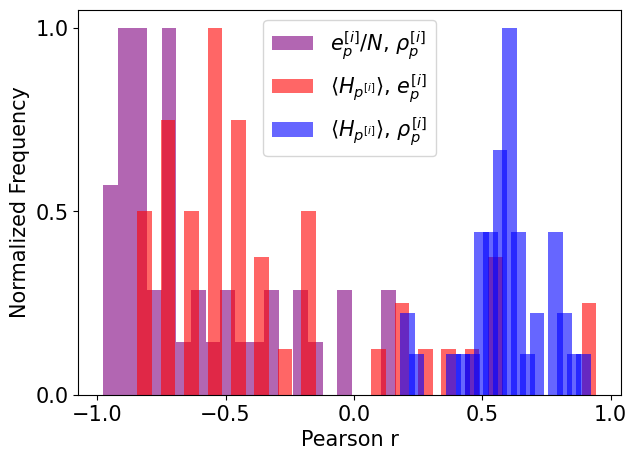

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Clean the data by removing NaN and infinite values
corr_er = np.array(corr_er)
corr_hr = np.array(corr_hr)
corr_he = np.array(corr_he)
corr_er = corr_er[~np.isnan(corr_er) & np.isfinite(corr_er)]
corr_hr = corr_hr[~np.isnan(corr_hr) & np.isfinite(corr_hr)]
corr_he = corr_he[~np.isnan(corr_he) & np.isfinite(corr_he)]

# Normalize histograms manually
counts_er, bins_er = np.histogram(corr_er, bins=20, density=False)
counts_hr, bins_hr = np.histogram(corr_hr, bins=20, density=False)
counts_he, bins_he = np.histogram(corr_he, bins=20, density=False)

# Normalize counts to make the maximum y-axis value 1
counts_er = counts_er / counts_er.max()
counts_hr = counts_hr / counts_hr.max()
counts_he = counts_he / counts_he.max()

# Calculate bin centers and bin width
bin_centers_er = (bins_er[:-1] + bins_er[1:]) / 2
bin_centers_hr = (bins_hr[:-1] + bins_hr[1:]) / 2
bin_centers_he = (bins_he[:-1] + bins_he[1:]) / 2
bin_width = bins_er[1] - bins_er[0]  # Use the same bin width for all

# Plot normalized histograms using bar plots
fig, ax = plt.subplots(figsize=(7, 5))
plt.bar(bin_centers_er, counts_er, width=bin_width, alpha=0.6, color='purple', label=r'$e_p^{[i]}/N$, $\rho_p^{[i]}$')
plt.bar(bin_centers_he, counts_he, width=bin_width, alpha=0.6, color='red', label=r'$\langle H_{p^{[i]}}\rangle$, $e_p^{[i]}$')
plt.bar(bin_centers_hr, counts_hr, width=bin_width, alpha=0.6, color='blue', label=r'$\langle H_{p^{[i]}}\rangle$, $\rho_p^{[i]}$')

# Add labels and ticks
plt.xticks([-1.0, -0.5, 0.0, 0.5, 1.0], fontsize=15)
plt.yticks([0.0, 0.5, 1.0], fontsize=15)
plt.xlabel('Pearson r', fontsize=15)
plt.ylabel('Normalized Frequency', fontsize=15)
plt.legend(fontsize=15)  # Add legend to display labels
plt.savefig("histogram_correlation.pdf", bbox_inches='tight')
plt.show()

# site phipq

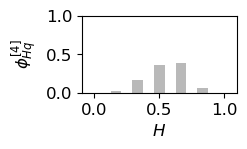

In [88]:
q = '(((....)))..'
site = 4
phipq_q_site = defaultdict(float)
for key,val in phipq_site[q][site].items():
    if key == '.'*L: continue
    if key == q: continue 
    phipq_q_site[hamming(key,q)]+= val*neutralsets[q]*L*(K-1)

normalisation = sum(list(phipq_q_site.values()))
sorted_keys = sorted(phipq_q_site.keys())
for H in sorted_keys:
    phipq_q_site[H] = phipq_q_site[H]/normalisation
bin_edges = np.linspace(-0.5 / L, 12.5 / L, 14)  # 13 bins centered on 0/12, 1/12, ..., 12/12

fig, ax = plt.subplots(figsize=(2,1))
plt.hist(list(phipq_q_site.keys()), bins= bin_edges, weights=list(phipq_q_site.values()), alpha=0.5, color='#747474ff', label=r'$\phi(H)$')
plt.xlabel(r'$H$', size=12)
plt.ylabel(r'$\phi^{[4]}_{Hq}$', size=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0.0,0.5,1.0])
plt.yticks([0.0,0.5,1.0])
plt.savefig("phi_hamming_site4.pdf",bbox_inches='tight')


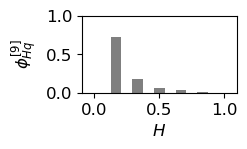

In [89]:
q = '(((....)))..'
site = 9
phipq_q_site = defaultdict(float)
for key,val in phipq_site[q][site].items():
    if key == '.'*L: continue
    if key == q: continue 
    phipq_q_site[hamming(key,q)]+= val*neutralsets[q]*L*(K-1)

normalisation = sum(list(phipq_q_site.values()))
sorted_keys = sorted(phipq_q_site.keys())
for H in sorted_keys:
    phipq_q_site[H] = phipq_q_site[H]/normalisation
bin_edges = np.linspace(-0.5 / L, 12.5 / L, 14)  # 13 bins centered on 0/12, 1/12, ..., 12/12

fig, ax = plt.subplots(figsize=(2,1))
plt.hist(list(phipq_q_site.keys()), bins= bin_edges, weights=list(phipq_q_site.values()), alpha=0.5, color='#000000ff', label=r'$\phi(H)$')
plt.xlabel(r'$H$', size=12)
plt.ylabel(r'$\phi^{[9]}_{Hq}$', size=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0.0,0.5,1.0])
plt.yticks([0.0,0.5,1.0])
plt.savefig("phi_hamming_site9.pdf",bbox_inches='tight')

([<matplotlib.axis.YTick at 0x153f951d6f10>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

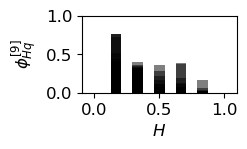

In [22]:
q = '(((....)))..'
fig, ax = plt.subplots(figsize=(2,1))

for site in range(12):
    phipq_q_site = defaultdict(float)
    for key,val in phipq_site[q][site].items():
        if key == '.'*L: continue
        if key == q: continue 
        phipq_q_site[hamming(key,q)]+= val*neutralsets[q]*L*(K-1)

    normalisation = sum(list(phipq_q_site.values()))
    sorted_keys = sorted(phipq_q_site.keys())
    for H in sorted_keys:
        phipq_q_site[H] = phipq_q_site[H]/normalisation
    bin_edges = np.linspace(-0.5 / L, 12.5 / L, 14)  # 13 bins centered on 0/12, 1/12, ..., 12/12

    plt.hist(list(phipq_q_site.keys()), bins= bin_edges, weights=list(phipq_q_site.values()), alpha=0.5, color='black', label=r'$\phi(H)$')
plt.xlabel(r'$H$', size=12)
plt.ylabel(r'$\phi^{[9]}_{Hq}$', size=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0.0,0.5,1.0])
plt.yticks([0.0,0.5,1.0])

/tmp/ipykernel_1014978/2207644950.py:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar


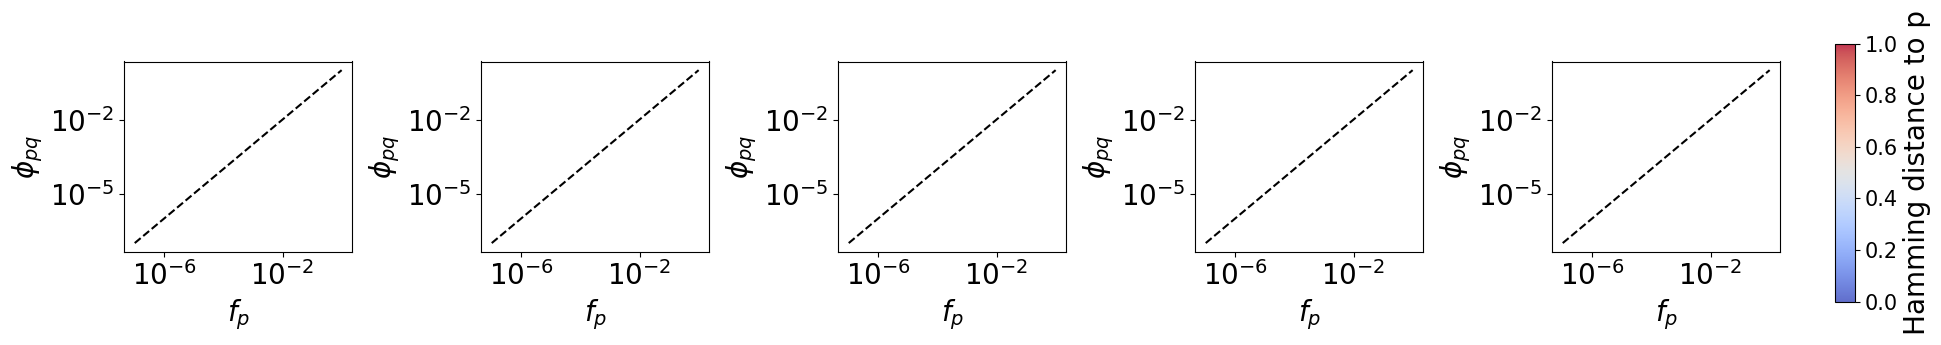

In [23]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

fig = plt.figure(figsize=(20, 3))
gs = GridSpec(1, 5, figure=fig)

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

listphipq = []
listhamming = []
listfreq = []
phipqhamming = defaultdict(tuple)

# Lists for different Hamming distance ranges
listphipq_ranges = [[] for _ in range(5)]
listhamming_ranges = [[] for _ in range(5)]
listfreq_ranges = [[] for _ in range(5)]

# Process data and aggregate for the scatter plot
for i, key in enumerate(sort_neutralsets.keys()):
    if i == 0:
        continue

    qitems = phipq[key]
    
    for q, phi in qitems.items():
        if q == '.'*L or q == key:
            continue
        hamming_dist = hamming(key, q)
        listphipq.append(phi)
        listhamming.append(hamming_dist)
        listfreq.append(neutralsets[q+'\n'] / K**L)

        # Assign to appropriate range
        if hamming_dist < 4/12:
            idx = 0
        elif hamming_dist < 6/12 and hamming_dist >= 4/12:
            idx = 1
        elif hamming_dist < 8/12 and hamming_dist >= 6/12:
            idx = 2
        elif hamming_dist < 10/12 and hamming_dist >= 8/12:
            idx = 3
            phipqhamming[(key,q)] = (phi,neutralsets[q+'\n'] / K**L)
        else:
            idx = 4

        listphipq_ranges[idx].append(phi)
        listhamming_ranges[idx].append(hamming_dist)
        listfreq_ranges[idx].append(neutralsets[q+'\n'] / K**L)

# Create subplots
axes = []
for j in range(5):
    ax = fig.add_subplot(gs[0, j])
    scatter = ax.scatter(listfreq_ranges[j], listphipq_ranges[j], s=60, c=listhamming_ranges[j], cmap=cmap, norm=norm, alpha=0.8)
    ax.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
    ax.set_xscale("log")
    ax.set_yscale('log')
    ax.set_xticks([1e-6, 1e-2])
    ax.set_xlabel(r'$f_p$', fontsize=20)
    ax.set_ylabel(r'$\phi_{pq}$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    axes.append(ax)

# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.86])  # [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax)
cbar.set_label('Hamming distance to p', fontsize=20)
cbar.ax.tick_params(labelsize=15)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar
plt.savefig("phipq_combined.png", bbox_inches='tight')
plt.show()

/tmp/ipykernel_1014978/2219246329.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar


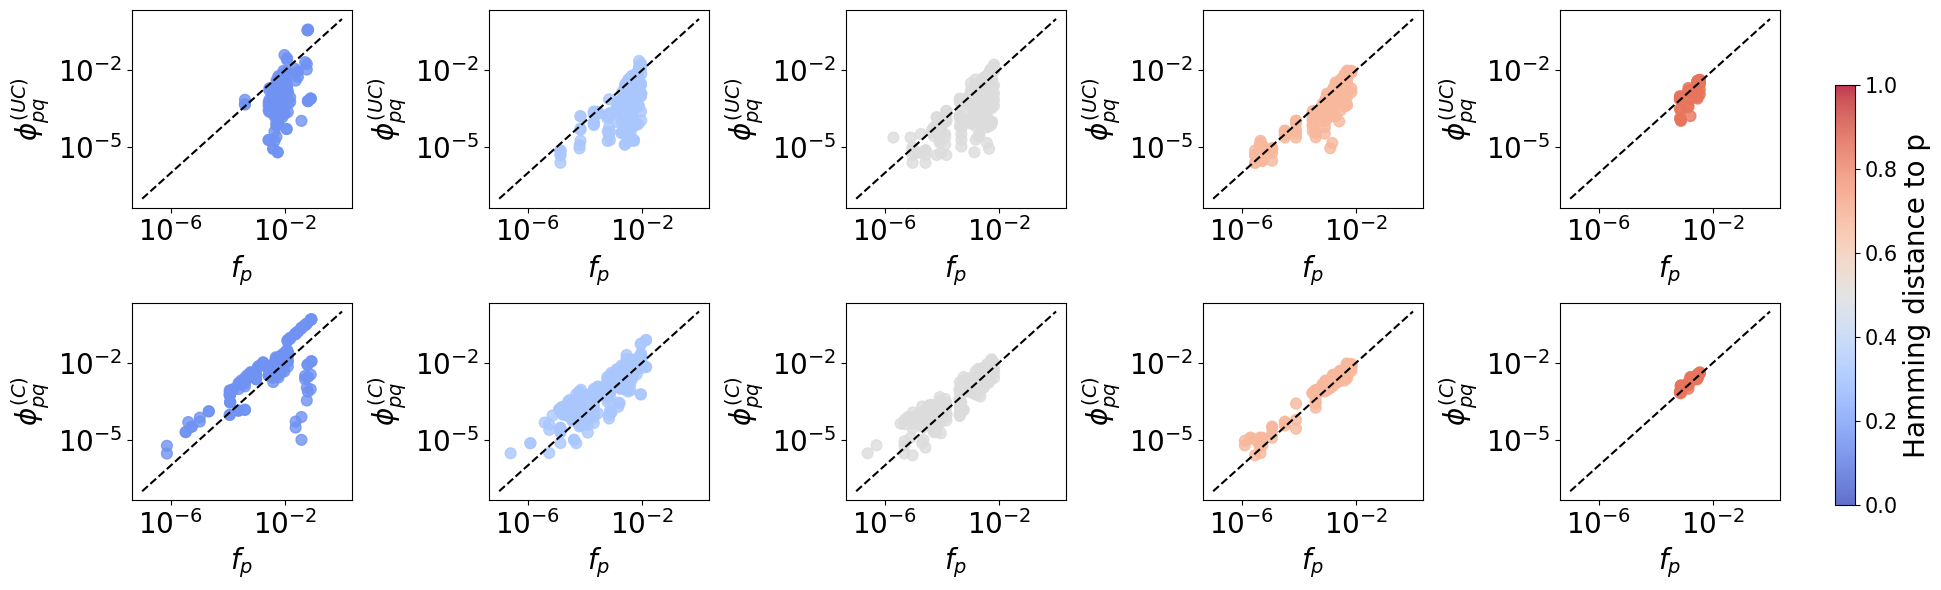

In [24]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from collections import defaultdict
from matplotlib.gridspec import GridSpec

sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

fig = plt.figure(figsize=(20, 6))
gs = GridSpec(2, 5, figure=fig)

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

# Lists for different Hamming distance ranges
listphipq_site_uc = [[] for _ in range(5)]
listphipq_uc = [[] for _ in range(5)]
listhamming_ranges_uc = [[] for _ in range(5)]
listfreq_ranges_uc = [[] for _ in range(5)]
listphipq_site_c = [[] for _ in range(5)]
listphipq_c = [[] for _ in range(5)]
listhamming_ranges_c = [[] for _ in range(5)]
listfreq_ranges_c = [[] for _ in range(5)]

# Process data and aggregate for the scatter plot
for i, key in enumerate(list(sort_neutralsets.keys())[1:8]):
    if i == 0:
        continue

    qitems = phipq[key]
    
    for q, phi in qitems.items():
        if q == '.'*L or q == key:
            continue
        hamming_dist = hamming(key, q)
        freq = neutralsets[q+'\n'] / K**L

        # Assign to appropriate range
        if hamming_dist < 4/12:
            idx = 0
        elif hamming_dist < 6/12 and hamming_dist >= 4/12:
            idx = 1
        elif hamming_dist < 8/12 and hamming_dist >= 6/12:
            idx = 2
        elif hamming_dist < 10/12 and hamming_dist >= 8/12:
            idx = 3
        else:
            idx = 4

        for site in range(L):  # Row index: Site
            if key[site] == '.':  # unconstrained
                listphipq_site_uc[idx].append(phipq_site[key][site].get(q, 0))
                listhamming_ranges_uc[idx].append(hamming_dist)
                listphipq_uc[idx].append(phi)
            else:  # constrained
                listphipq_site_c[idx].append(phipq_site[key][site].get(q, 0))
                listhamming_ranges_c[idx].append(hamming_dist)
                listphipq_c[idx].append(phi)

# Create subplots
axes = []
for j in range(5):
    # Unconstrained sites
    ax_uc = fig.add_subplot(gs[0, j])
    scatter_uc = ax_uc.scatter(listphipq_uc[j], listphipq_site_uc[j], s=60, c=listhamming_ranges_uc[j], cmap=cmap, norm=norm, alpha=0.8)
    ax_uc.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
    ax_uc.set_xscale("log")
    ax_uc.set_yscale('log')
    ax_uc.set_xticks([1e-6, 1e-2])
    ax_uc.set_xlabel(r'$f_p$', fontsize=20)
    ax_uc.set_ylabel(r'$\phi_{pq}^{(UC)}$', fontsize=20)
    ax_uc.tick_params(axis='both', which='major', labelsize=20)
    axes.append(ax_uc)

    # Constrained sites
    ax_c = fig.add_subplot(gs[1, j])
    scatter_c = ax_c.scatter(listphipq_c[j], listphipq_site_c[j], s=60, c=listhamming_ranges_c[j], cmap=cmap, norm=norm, alpha=0.8)
    ax_c.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
    ax_c.set_xscale("log")
    ax_c.set_yscale('log')
    ax_c.set_xticks([1e-6, 1e-2])
    ax_c.set_xlabel(r'$f_p$', fontsize=20)
    ax_c.set_ylabel(r'$\phi_{pq}^{(C)}$', fontsize=20)
    ax_c.tick_params(axis='both', which='major', labelsize=20)
    axes.append(ax_c)

# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(scatter_uc, cax=cbar_ax)
cbar.set_label('Hamming distance to p', fontsize=20)
cbar.ax.tick_params(labelsize=15)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar
plt.savefig("phipq_combined.png", bbox_inches='tight')
plt.show()

/tmp/ipykernel_1014978/1526360140.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


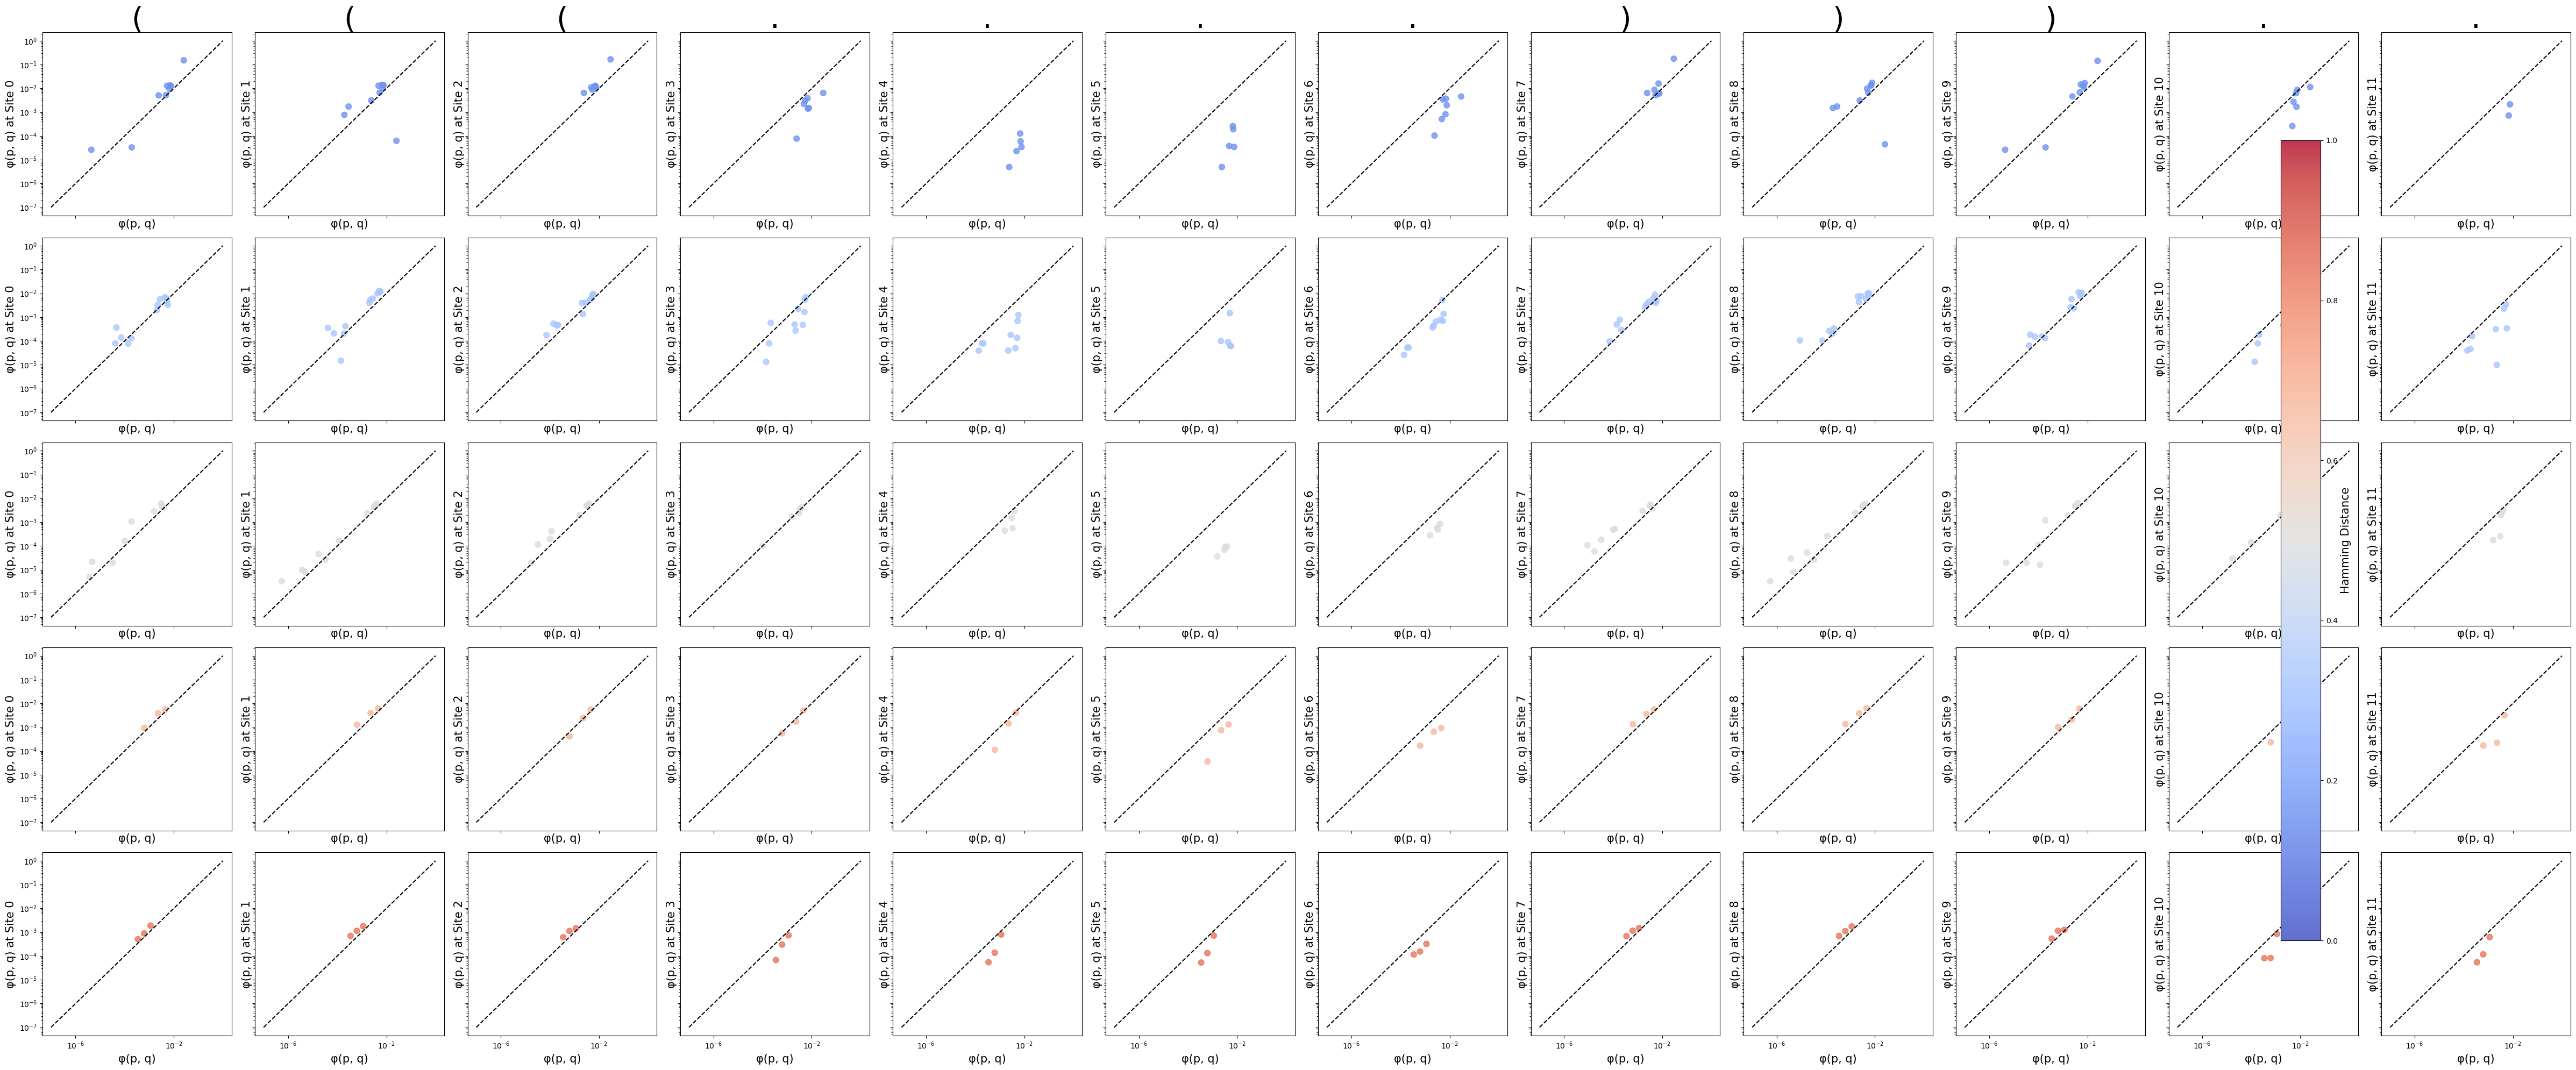

In [25]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec

sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

# Define colormap
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

# Define ranges of Hamming distance
hamming_ranges = [(0, 4/12), (4/12, 6/12), (6/12, 8/12), (8/12, 10/12), (10/12, 1)]
num_sites = L  # Assuming L is defined in your script

# Prepare figure layout
fig, axes = plt.subplots(len(hamming_ranges), num_sites, figsize=(num_sites * 4, len(hamming_ranges) * 4), sharex=True, sharey=True)
m = 1
# Process data
for i, (h_min, h_max) in enumerate(hamming_ranges):  # Row index: Hamming range
    for site in range(num_sites):  # Column index: Site
        ax = axes[i, site]
        phipq_values = []
        phipq_site_values = []
        hamming_values = []

        # Iterate over keys
        #for key in sort_neutralsets.keys():
        key = list(sort_neutralsets.keys())[m]
        for q, phi in phipq[key].items():
                if q == '.' * L or q == key:
                    continue
                
                hamming_dist = hamming(key, q)
                if h_min <= hamming_dist < h_max:
                    phipq_values.append(phi)
                    phipq_site_values.append(phipq_site[key][site].get(q, 0))
                    hamming_values.append(hamming_dist)

        # Scatter plot
        sc = ax.scatter(phipq_values, phipq_site_values, c=hamming_values, cmap=cmap, norm=norm, alpha=0.8, s=60)
        ax.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
        if i == 0: ax.set_title(str(list(sort_neutralsets.keys())[m][site]), fontsize=40)
        ax.set_xscale("log")
        ax.set_yscale('log')
        ax.set_xticks([1e-6, 1e-2])
        ax.set_xlabel("φ(p, q)")
        ax.set_ylabel(f"φ(p, q) at Site {site}")

# Add colorbar
fig.colorbar(sc, ax=axes, orientation='vertical', fraction=0.02, pad=0.04, label="Hamming Distance")

plt.tight_layout()
plt.show()

/tmp/ipykernel_1014978/3449800758.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


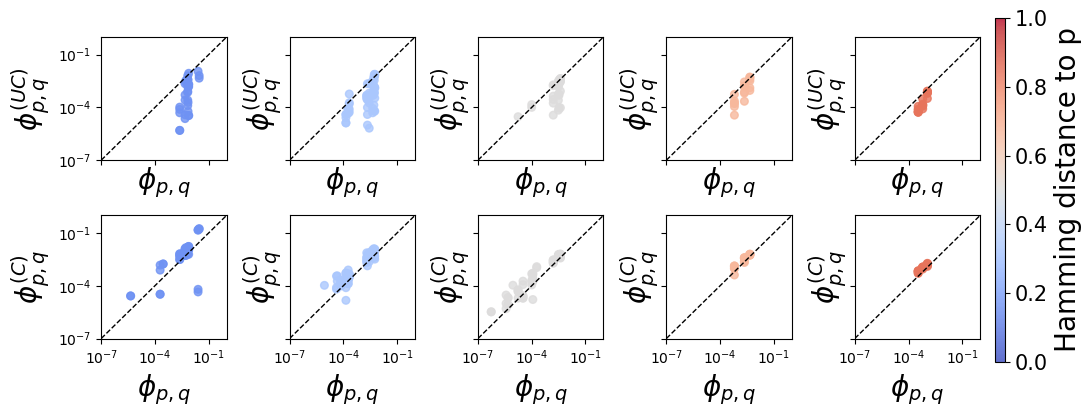

In [26]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec

sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

# Define colormap
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

# Define ranges of Hamming distance
hamming_ranges = [(0, 4/12), (4/12, 6/12), (6/12, 8/12), (8/12, 10/12), (10/12, 1)]
num_sites = L  # Assuming L is defined in your script
num_rows = 2  # Constrained and unconstrained
constrained_sites = []
unconstrained_sites = []
# Prepare figure layout
fig, axes = plt.subplots(num_rows, len(hamming_ranges), figsize=(len(hamming_ranges) * 2, num_rows * 2), sharex=True, sharey=True)
m = 1

# Process data
for j, (h_min, h_max) in enumerate(hamming_ranges):  # Column index: Hamming range
    #for key in list(sort_neutralsets.keys()):
    key = list(sort_neutralsets.keys())[m]
    constrained_sites = []
    unconstrained_sites = []        

    for site in range(num_sites):  # Row index: Site
                phipq_values = []
                phipq_site_values = []
                hamming_values = []
                for q, phi in phipq[key].items():
                    if q == '.' * L or q == key:
                        continue

                    hamming_dist = hamming(key, q)
                    if h_min <= hamming_dist < h_max:
                        phipq_values.append(phi)
                        phipq_site_values.append(phipq_site[key][site].get(q, 0))
                        hamming_values.append(hamming_dist)

                # Determine if the site is constrained or unconstrained
                if key[site] == '.':  # unconstrained
                    ax = axes[0, j]
                    ax.set_ylabel(r"$\phi_{p, q}^{(UC)}$", fontsize=20)
                else:
                    ax = axes[1, j]
                    ax.set_ylabel(r"$\phi_{p, q}^{(C)}$", fontsize=20)

                # Scatter plot
                sc = ax.scatter(phipq_values, phipq_site_values, c=hamming_values, cmap=cmap, norm=norm, alpha=0.8, s=30)
                ax.set_xlim(1e-7, 1)
                ax.set_ylim(1e-7, 1)
                ax.set_xscale("log")
                ax.set_yscale('log')
                # ax.set_xticks([1e-6, 1e-2])
                ax.set_xlabel(r"$\phi_{p, q}$", fontsize=20)
                # ax.set_title(f"Site {site}, Hamming [{h_min:.2f}-{h_max:.2f})", fontsize=10)
# Add colorbar
    axes[0,j].plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--', linewidth=1.0)
    axes[1,j].plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--', linewidth=1.0)

cbar_ax = fig.add_axes([1.0, 0.15, 0.01, 0.86])  # [left, bottom, width, height]
cbar = fig.colorbar(sc, cax=cbar_ax)
cbar.set_label('Hamming distance to p', fontsize=20)
cbar.ax.tick_params(labelsize=15)

plt.tight_layout()
plt.show()

/tmp/ipykernel_1014978/2654882307.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


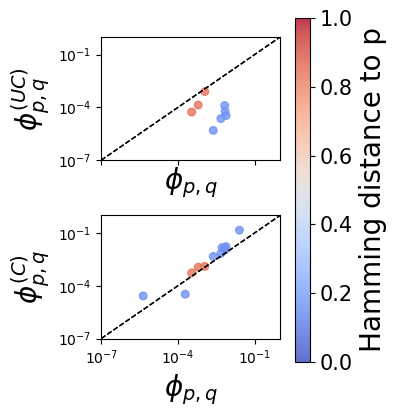

In [27]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec

sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

# Define colormap
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

# Define ranges of Hamming distance
hamming_ranges = [(0, 4/12),(10/12, 1)]
num_sites = L  # Assuming L is defined in your script
num_rows = 2  # Constrained and unconstrained
constrained_sites = []
unconstrained_sites = []
# Prepare figure layout
fig, axes = plt.subplots(num_rows, 1, figsize=(3, num_rows * 2), sharex=True, sharey=True)
m = 1

# Process data
for j, (h_min, h_max) in enumerate(hamming_ranges):  # Column index: Hamming range
    #for key in list(sort_neutralsets.keys()):
    key = list(sort_neutralsets.keys())[m]
    constrained_sites = []
    unconstrained_sites = []        

    for site in [4,9]:  # Row index: Site
                phipq_values = []
                phipq_site_values = []
                hamming_values = []
                for q, phi in phipq[key].items():
                    if q == '.' * L or q == key:
                        continue

                    hamming_dist = hamming(key, q)
                    if h_min <= hamming_dist < h_max:
                        phipq_values.append(phi)
                        phipq_site_values.append(phipq_site[key][site].get(q, 0))
                        hamming_values.append(hamming_dist)

                # Determine if the site is constrained or unconstrained
                if site == 4:  # unconstrained
                    ax = axes[0]
                    ax.set_ylabel(r"$\phi_{p, q}^{(UC)}$", fontsize=20)
                else:
                    ax = axes[1]
                    ax.set_ylabel(r"$\phi_{p, q}^{(C)}$", fontsize=20)

                # Scatter plot
                sc = ax.scatter(phipq_values, phipq_site_values, c=hamming_values, cmap=cmap, norm=norm, alpha=0.8, s=30)
                ax.set_xlim(1e-7, 1)
                ax.set_ylim(1e-7, 1)
                ax.set_xscale("log")
                ax.set_yscale('log')
                # ax.set_xticks([1e-6, 1e-2])
                ax.set_xlabel(r"$\phi_{p, q}$", fontsize=20)
                # ax.set_title(f"Site {site}, Hamming [{h_min:.2f}-{h_max:.2f})", fontsize=10)
# Add colorbar
    axes[0].plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--', linewidth=1.0)
    axes[1].plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--', linewidth=1.0)

cbar_ax = fig.add_axes([1.0, 0.15, 0.05, 0.86])  # [left, bottom, width, height]
cbar = fig.colorbar(sc, cax=cbar_ax)
cbar.set_label('Hamming distance to p', fontsize=20)
cbar.ax.tick_params(labelsize=15)

plt.tight_layout()
plt.show()

(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..


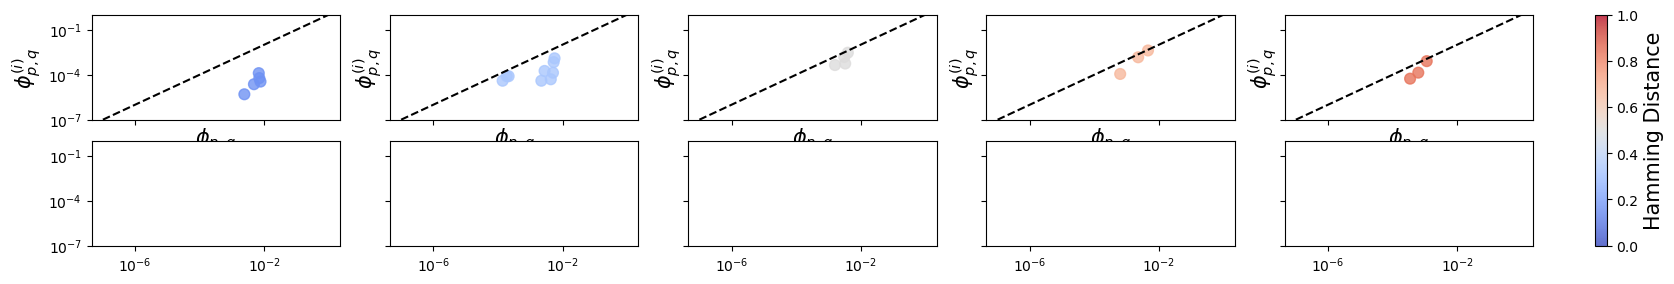

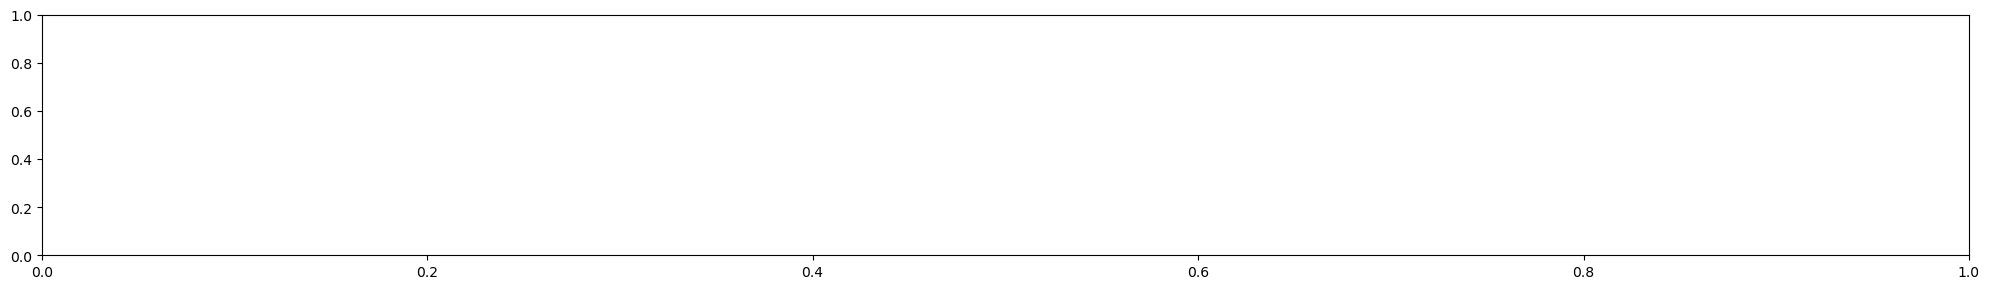

In [28]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec

sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

# Define colormap
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

# Define ranges of Hamming distance
hamming_ranges = [(0, 4/12), (4/12, 6/12), (6/12, 8/12), (8/12, 10/12), (10/12, 1)]
num_sites = L  # Assuming L is defined in your script
num_rows = 2  # Constrained and unconstrained
constrained_sites = []
unconstrained_sites = []
# Prepare figure layout
fig, axes = plt.subplots(num_rows, len(hamming_ranges), figsize=(20, 3), sharex=True, sharey=True)
fig = plt.figure(figsize=(20, 3))
m = 1

# Process data
for j, (h_min, h_max) in enumerate(hamming_ranges):  # Column index: Hamming range
      for key in [list(sort_neutralsets.keys())[1]]:
        print(key)
        for site in [4]:
                phipq_values = []
                phipq_site_values = []
                hamming_values = []
                for q, phi in phipq[key].items():
                    if q == '.' * L or q == key:
                        continue

                    hamming_dist = hamming(key, q)
                    if h_min <= hamming_dist < h_max:
                        phipq_values.append(phi)
                        phipq_site_values.append(phipq_site[key][site].get(q, 0))
                        hamming_values.append(hamming_dist)

                # Determine if the site is constrained or unconstrained
                if key[site] == '.':  # unconstrained
                    ax = axes[0, j]
                else:
                    ax = axes[1, j]

                # Scatter plot
                sc = ax.scatter(phipq_values, phipq_site_values, c=hamming_values, cmap=cmap, norm=norm, alpha=0.8, s=60)
                ax.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
                ax.set_xscale("log")
                ax.set_yscale('log')
                ax.set_xticks([1e-6, 1e-2])
                ax.set_ylim([1e-7, 1])
                ax.set_xlabel(r"$\phi_{p, q}$")
                ax.set_ylabel(r"$\phi_{p, q}^{(i)}$")
                # ax.set_title(f"Site {site}, Hamming [{h_min:.2f}-{h_max:.2f})", fontsize=10)

# Add colorbar
fig.colorbar(sc, ax=axes, orientation='vertical', fraction=0.03, pad=0.04, label="Hamming Distance")

plt.tight_layout()
plt.show()

(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..


/tmp/ipykernel_1014978/266088485.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


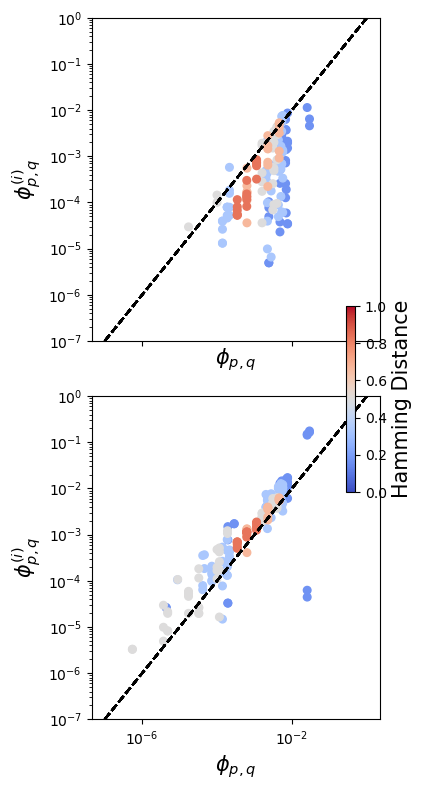

In [29]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec

sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

# Define colormap
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

# Define ranges of Hamming distance
hamming_ranges = [(0, 4/12), (4/12, 6/12), (6/12, 8/12), (8/12, 10/12), (10/12, 1)]
num_sites = L  # Assuming L is defined in your script
num_rows = 2  # Constrained and unconstrained
constrained_sites = []
unconstrained_sites = []
# Prepare figure layout
fig, axes = plt.subplots(num_rows, 1, figsize=( 4, num_rows * 4), sharex=True, sharey=True)
m = 1

# Process data
for j, (h_min, h_max) in enumerate(hamming_ranges):  # Column index: Hamming range
    for key in [list(sort_neutralsets.keys())[1]]:
        print(key)
        for site in range(L):
                phipq_values = []
                phipq_site_values = []
                hamming_values = []
                for q, phi in phipq[key].items():
                    if q == '.' * L or q == key:
                        continue

                    hamming_dist = hamming(key, q)
                    if h_min <= hamming_dist < h_max:
                        phipq_values.append(phi)
                        phipq_site_values.append(phipq_site[key][site].get(q, 0))
                        hamming_values.append(hamming_dist)

                # Determine if the site is constrained or unconstrained
                if key[site] == '.':  # unconstrained
                    ax = axes[0]
                else:
                    ax = axes[1]

                # Scatter plot
                sc = ax.scatter(phipq_values, phipq_site_values, c=hamming_values, cmap=cmap, norm=norm, alpha=1.0, s=30)
                ax.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
                ax.set_xscale("log")
                ax.set_yscale('log')
                ax.set_xticks([1e-6, 1e-2])
                ax.set_ylim([1e-7, 1])
                ax.set_xlabel(r"$\phi_{p, q}$")
                ax.set_ylabel(r"$\phi_{p, q}^{(i)}$")
                # ax.set_title(f"Site {site}, Hamming [{h_min:.2f}-{h_max:.2f})", fontsize=10)

# Add colorbar
fig.colorbar(sc, ax=axes, orientation='vertical', fraction=0.03, pad=0.04, label="Hamming Distance")

plt.tight_layout()
plt.show()

In [30]:
phipq_site_values

[5.428747686613206e-05, 0.0006234834464322468, 0.00011680032901501125]

/tmp/ipykernel_1014978/1990299791.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


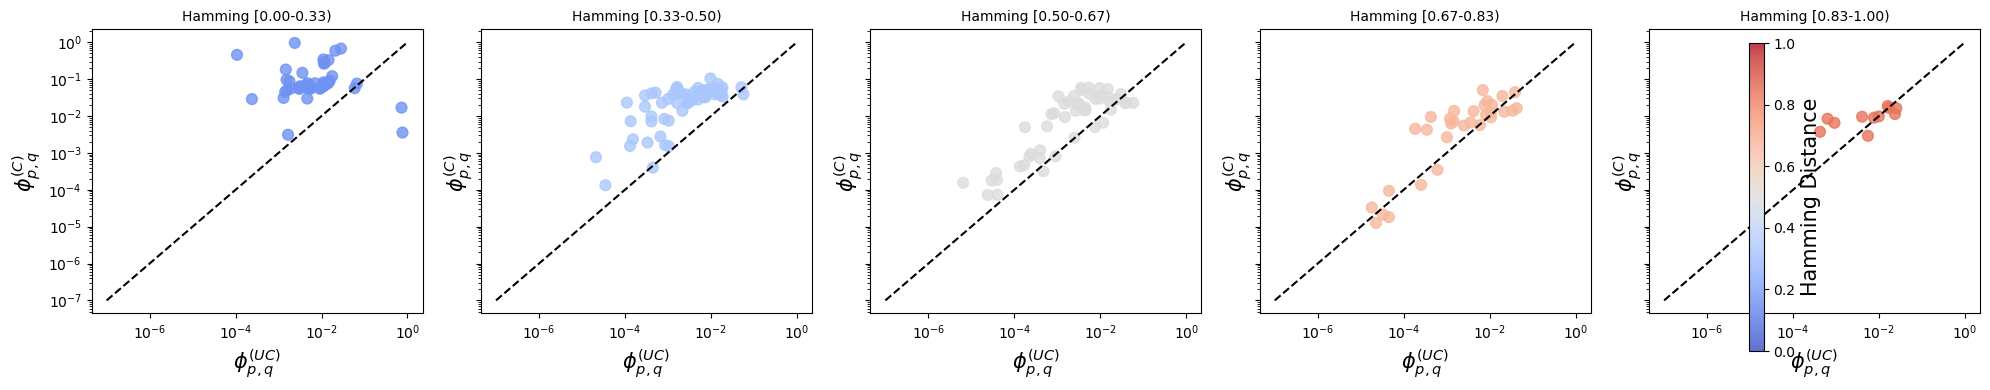

In [31]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec

sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

# Define colormap
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

# Define ranges of Hamming distance
hamming_ranges = [(0, 4/12), (4/12, 6/12), (6/12, 8/12), (8/12, 10/12), (10/12, 1)]
num_sites = L  # Assuming L is defined in your script
num_cols = len(hamming_ranges)  # Number of Hamming distance ranges

# Prepare figure layout
fig, axes = plt.subplots(1, num_cols, figsize=(num_cols * 4, 4), sharex=True, sharey=True)

# Process data
for j, (h_min, h_max) in enumerate(hamming_ranges):  # Column index: Hamming range
    phipq_uc_values = []
    phipq_c_values = []
    hamming_values = []

    for key in list(sort_neutralsets.keys())[1:8]:
        constrained_sites = []
        unconstrained_sites = []

        for site in range(L):
            if key[site] == '.':
                unconstrained_sites.append(site)
            else:
                constrained_sites.append(site)

        # Union of q values from all unconstrained sites
        unconstrained_qs = set()
        for site in unconstrained_sites:
            unconstrained_qs.update(q for q, phi in phipq_site[key][site].items())

        # Union of q values from all constrained sites
        constrained_qs = set()
        for site in constrained_sites:
            constrained_qs.update(q for q, phi in phipq_site[key][site].items())

        # Intersection of q values from unconstrained and constrained sites
        common_qs = unconstrained_qs.intersection(constrained_qs)

          # Row index: Site
        for q, phi in phipq[key].items():
            if q == '.' * L or q == key or q not in common_qs: continue
            hamming_dist = hamming(key, q)
            if h_min <= hamming_dist < h_max:
                hamming_values.append(hamming_dist)
                val_c = 0
                val_uc = 0
                for site in range(num_sites):
                    
                        if key[site] == '.':
                            val_uc+=phipq_site[key][site].get(q, 0)
                        else:
                            val_c+=phipq_site[key][site].get(q, 0)
                phipq_uc_values.append(val_uc)
                phipq_c_values.append(val_c)
    ax = axes[j]

    # Scatter plot
    sc = ax.scatter(phipq_uc_values, phipq_c_values, c=hamming_values, cmap=cmap, norm=norm, alpha=0.8, s=60)
    ax.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
    ax.set_xscale("log")
    ax.set_yscale('log')
    ax.set_xlabel(r"$\phi_{p, q}^{(UC)}$")
    ax.set_ylabel(r"$\phi_{p, q}^{(C)}$")
    ax.set_title(f"Hamming [{h_min:.2f}-{h_max:.2f})", fontsize=10)

# Add colorbar
fig.colorbar(sc, ax=axes, orientation='vertical', fraction=0.03, pad=0.04, label="Hamming Distance")

plt.tight_layout()
plt.show()